### Data Analysis

#### Libraries

In [1]:
#Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from pathlib import Path
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler

#### Data import using API

In [2]:
# Save the dataset to '/dataset' 
url = "https://storage.googleapis.com/the_public_bucket/wine-clustering.csv"
output_file = Path("dataset/wine-clustering.csv")

try:
    response = requests.get(url)
    response.raise_for_status()

    with output_file.open("wb") as file:
        file.write(response.content)

    print(f"Successful download. File saved in: {output_file}")
except requests.exceptions.HTTPError as err:
    print(f"Error downloading file. Status code: {err.response.status_code}")
except Exception as e:
    print(f"Error: {e}")

Successful download. File saved in: dataset\wine-clustering.csv


In [3]:
# Load the dataset
df = pd.read_csv("dataset/wine-clustering.csv")

#### Initial exploration of the dataset

##### Basic Information about the dataset

In [4]:
# How many variables of each data type do we have in the dataset?
(
    df
    .dtypes
    .value_counts()
)

float64    11
int64       2
Name: count, dtype: int64

In [5]:
# What are the dimesions of the dataset?
df.shape

(178, 13)

In [6]:
# Show the first 5 rows
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Show the last 5 rows
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [8]:
# How is each variable?
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### Is cleaning necessary?

In [9]:
# Is there null data? - No
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
# Are there duplicate data? - No
df.duplicated().any()

False

#### Data Visualization

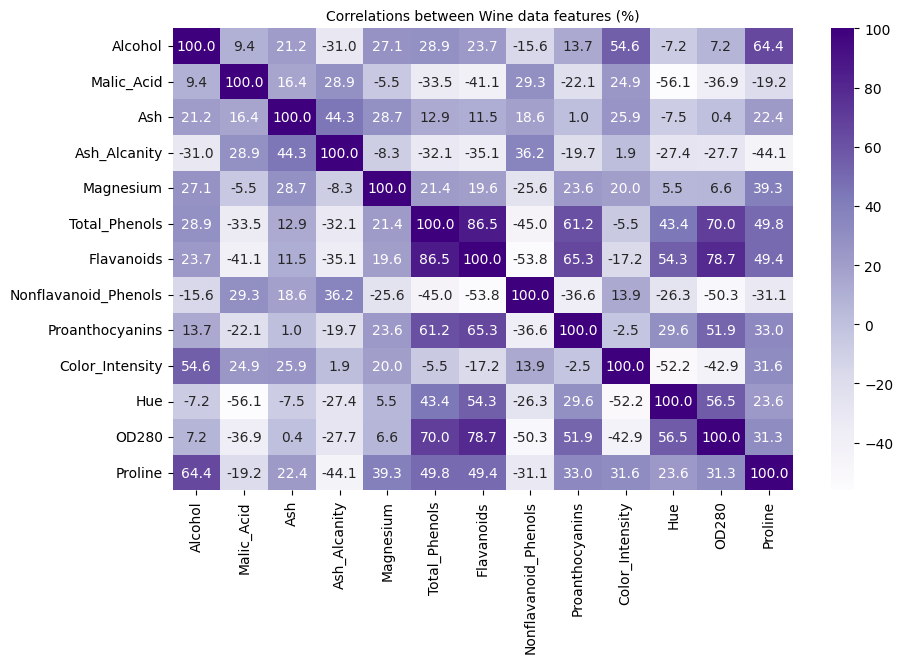

In [11]:
#Let's look at the correlation between the wine data features
corr = df.corr() * 100

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='Purples',fmt=".1f")
plt.title('Correlations between Wine data features (%)', fontsize=10)
plt.savefig('graphics/corr/Correlations_between_Wine_data_features.png', dpi= 500, bbox_inches='tight')
plt.show()


In [12]:
# Function to plot
def generate_table(data, title, label1, label2):
    fig, ax = plt.subplots(figsize=(8, 4)) # Create a plot
    ax.axis('off')  # Disable axes to make it look like a table
    table_data = [list(data.index), list(data.values.round(2))]
    table = ax.table(cellText=list(zip(*table_data)), loc='center', colLabels=[label1, label2], cellLoc='center', colColours=['purple']*2)
    table.auto_set_font_size(False) # Set the table style 
    table.set_fontsize(10)
    table.scale(1, 1.5)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width([0, 1])
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_text_props(color='white')
    plt.title(title, fontsize=16, color='purple')
    plt.savefig(f'graphics/table/{title}_table.png', dpi= 600, bbox_inches='tight')
    plt.show()

def generate_bar_chart(data, title, label1, label2):
    plt.bar(data.index.map(str), data.values, color = 'purple')
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.title(title, fontsize=16, color='purple')
    plt.xticks(rotation=45,ha='right')
    for index, value in enumerate(data):
        plt.text(index, value / 2, str(round(value,1)), ha='center', va='bottom', color='white', fontweight='bold')
    plt.savefig(f'graphics/bar/{title}_bar.png', dpi= 600, bbox_inches='tight')
    plt.show()

def generate_barh_chart(data, title, label1, label2):
    plt.barh(data.index.map(str), data.values, color='purple')  
    plt.ylabel(label1)
    plt.xlabel(label2)
    plt.title(title, fontsize=16, color='purple')
    plt.yticks(rotation=0, ha='right')
    for index, value in enumerate(data):
        plt.text(value, index, str(round(value, 1)), ha='left', va='center', fontweight='bold')
    plt.savefig(f'graphics/barh/{title}_barh.png', dpi=600, bbox_inches='tight')
    plt.show()

def plot_cluster_corr(df_cluster, cluster_number):
    corr = df_cluster.corr() * 100
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, annot=True, cmap='Blues', fmt=".1f")
    plt.title(f'Correlations between the characteristics of the wines on the cultivar {cluster_number}', fontsize=12, color='Blue')
    plt.savefig(f'graphics/corr/Wine correlations on the cultivar {cluster_number}.png', dpi= 500, bbox_inches='tight')
    plt.show()

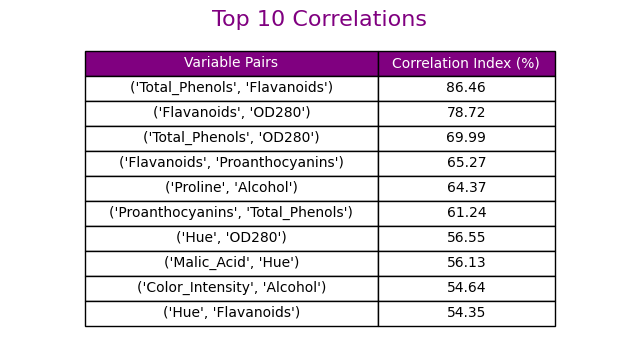

In [13]:
# What are the top ten correlations with the highest percentage?
correlation_matrix = corr 
abs_correlation = correlation_matrix.abs() # Get the absolute value of the correlations

mask = ~pd.DataFrame(np.eye(len(abs_correlation), dtype=bool), index=abs_correlation.index, columns=abs_correlation.columns) # Exclude the diagonal (relationship with itself)
abs_correlation = abs_correlation.where(mask)

top_correlation_vars = abs_correlation.unstack().sort_values(ascending=False).drop_duplicates().head(10) # Obtain the first 10 variables with the highest correlation index.

generate_table(top_correlation_vars, 'Top 10 Correlations', 'Variable Pairs', 'Correlation Index (%)')

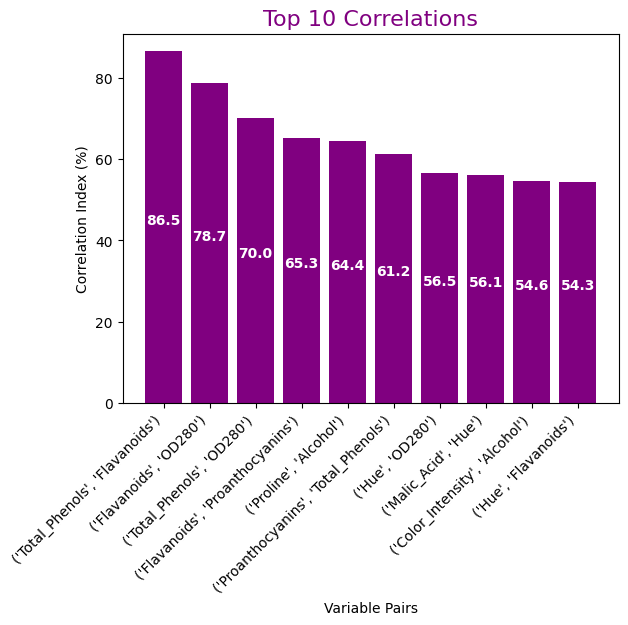

In [14]:
# Let's see these values in a bar chart
generate_bar_chart(top_correlation_vars, 'Top 10 Correlations', 'Variable Pairs', 'Correlation Index (%)')

### Cluster Analysis

#### How many Clusters should be used?

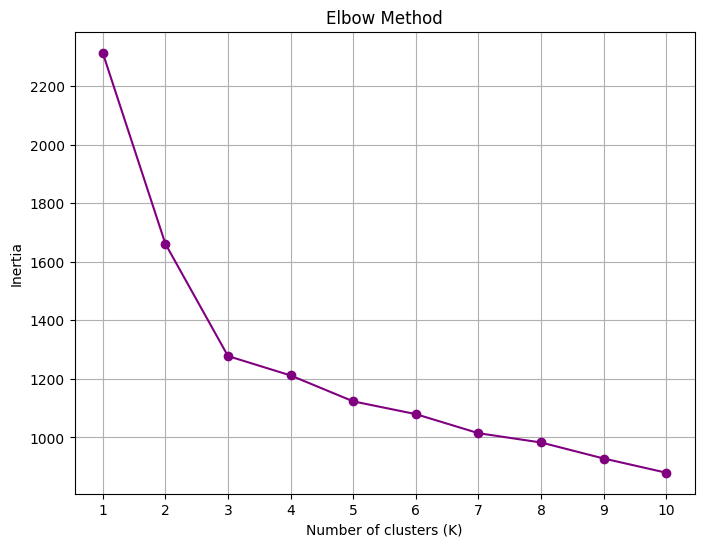

In [28]:
# Elbow Method 
numeric_data = df.select_dtypes(include=['float64', 'int64']) # Standardize data
scaled_data = StandardScaler().fit_transform(numeric_data)

inertia_values = [] #List to save the inertia values
k_values = range(1, 11)  # I will test from 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42) # We initialize and fit the KMeans model with K clusters.
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_) # We save the inertia in the list.

plt.figure(figsize=(8, 6)) # Plotting the Elbow Method
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='purple')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.savefig(f'graphics/clustering/elbowmethod.png', dpi= 600, bbox_inches='tight')
plt.show()

#### KMeans model

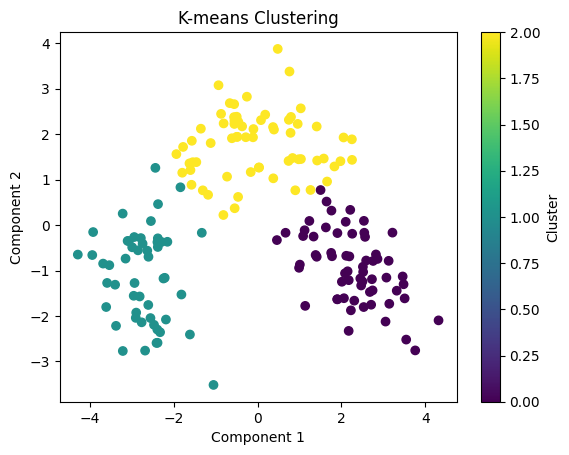

In [27]:
# Initializing the KMeans model
kmeans = KMeans(n_clusters=3, algorithm='elkan')
kmeans.fit(scaled_data) # Fit the model to standardized data
cluster_labels = kmeans.labels_ # Obtain cluster labels for each data point
pca = PCA(n_components=2) # Dimensionality reduction with PCA
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis') # Visualize the clusters
plt.title('K-means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.savefig(f'graphics/clustering/Clustering.png', dpi= 600, bbox_inches='tight')
plt.show()

#### Let's see what results we have on the clusters (cultivars).

In [17]:
# Cluster Mapping
df['Cultivars'] = kmeans.labels_ # Get the resulting labels from the clustering to analyze the characteristics of each cultivar.
mapping = {0: "Cultivar 1", 1: "Cultivar 2", 2: "Cultivar 3"}
df['Cultivars'] = df['Cultivars'].map(mapping)

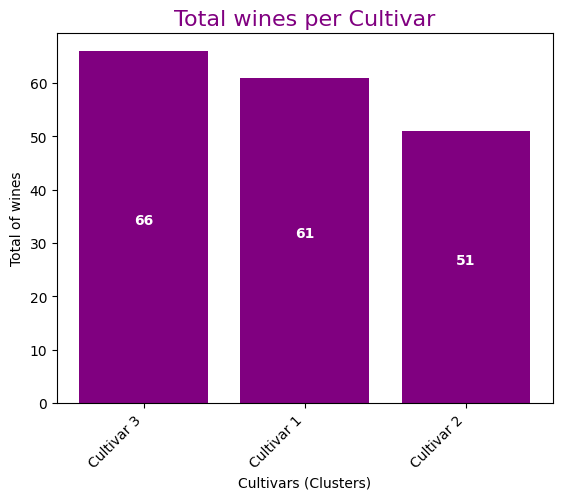

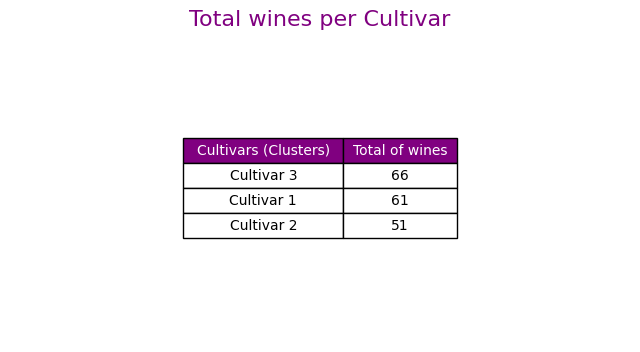

In [18]:
# How many wines do we have of each cultivar?
cluster_counts = df['Cultivars'].value_counts()
generate_bar_chart(cluster_counts, 'Total wines per Cultivar', 'Cultivars (Clusters)', 'Total of wines')
generate_table(cluster_counts, 'Total wines per Cultivar', 'Cultivars (Clusters)', 'Total of wines')

In [19]:
# The data for each crop is separated to explore its characteristics.
df_cluster1 = df[df["Cultivars"] == "Cultivar 1"]
df_cluster2 = df[df["Cultivars"] == "Cultivar 2"]
df_cluster3 = df[df["Cultivars"] == "Cultivar 3"]
del df_cluster1['Cultivars']
del df_cluster2['Cultivars']
del df_cluster3['Cultivars']

### Questions of value for the analysis of results

#### How correlated are the wine characteristics of each cultivar?

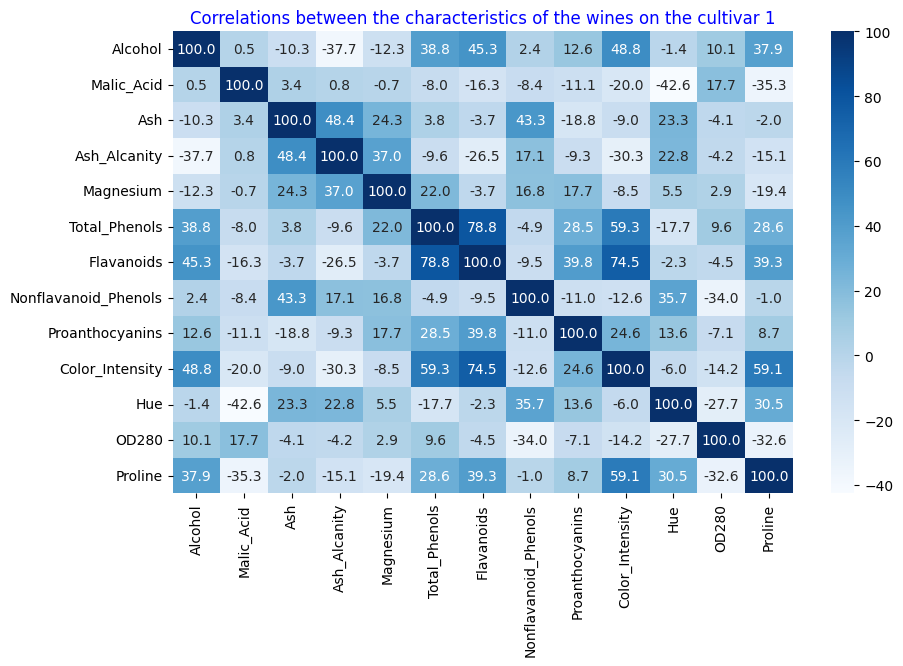

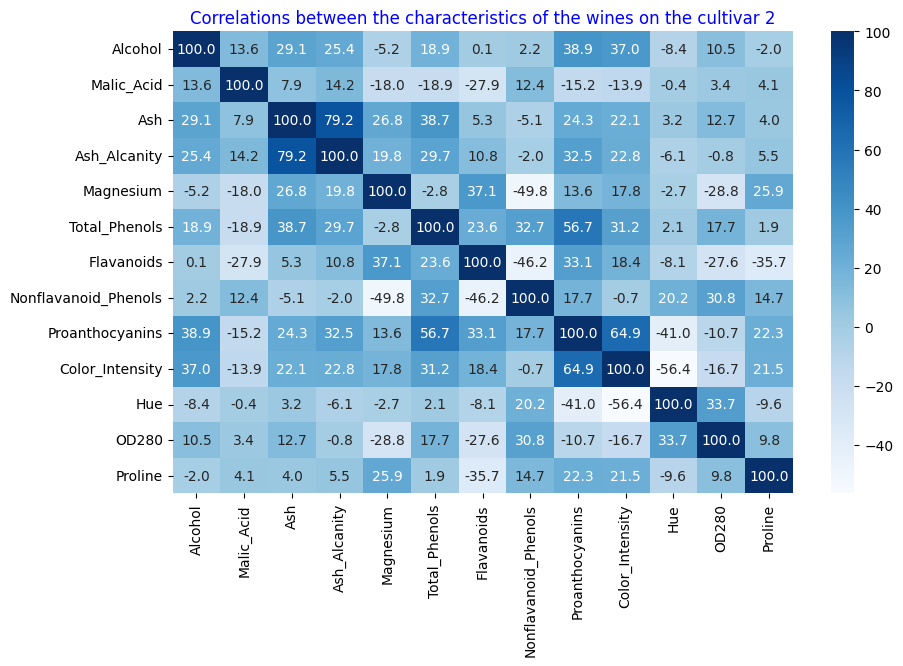

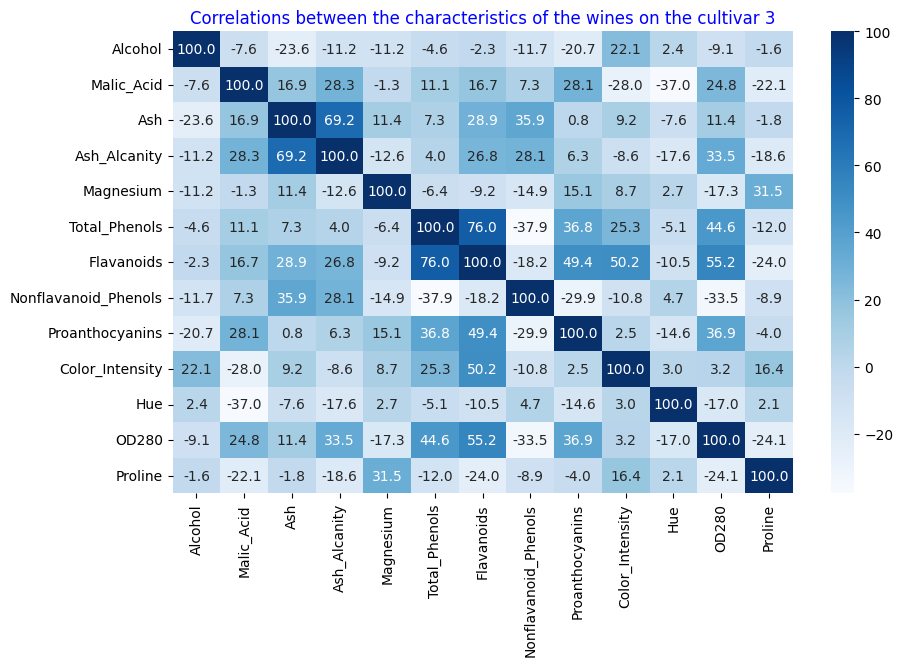

In [20]:
# Let's make correlation matrices for each cultivar.
plot_cluster_corr(df_cluster1, 1)
plot_cluster_corr(df_cluster2, 2)
plot_cluster_corr(df_cluster3, 3)

#### Which cultivar produces the most intensely colored wine?

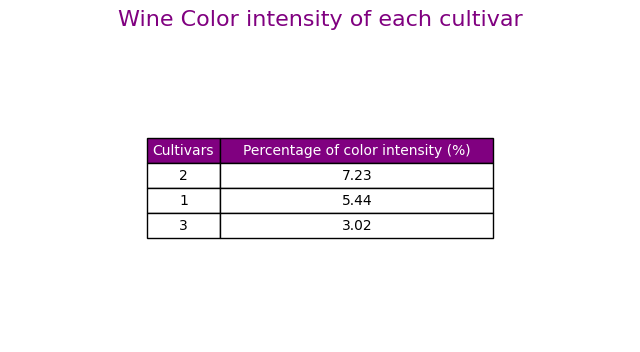

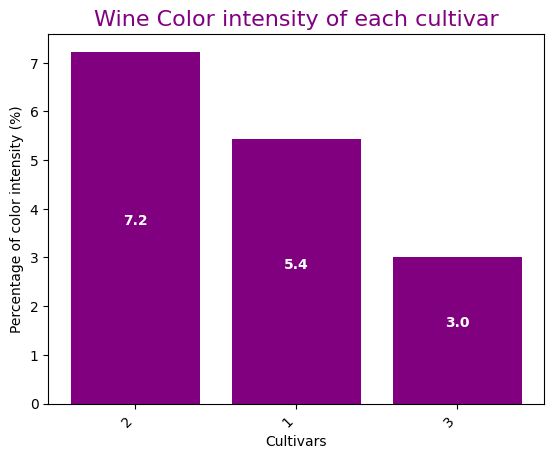

In [21]:
# Calculate the average color intensity of each cultivar and compare them in graphs.
averageintensitycolor = pd.Series({
    '1': df_cluster1['Color_Intensity'].mean().round(2),
    '2': df_cluster2['Color_Intensity'].mean().round(2),
    '3': df_cluster3['Color_Intensity'].mean().round(2)
})

# Mostrar la tabla de diferencias
generate_table(averageintensitycolor.sort_values(ascending=False), "Wine Color intensity of each cultivar", "Cultivars", "Percentage of color intensity (%)")

# Graficar las diferencias
generate_bar_chart(averageintensitycolor.sort_values(ascending=False), "Wine Color intensity of each cultivar", "Cultivars", "Percentage of color intensity (%)")

#### Which cultivar produces the wine with the highest alcohol content?

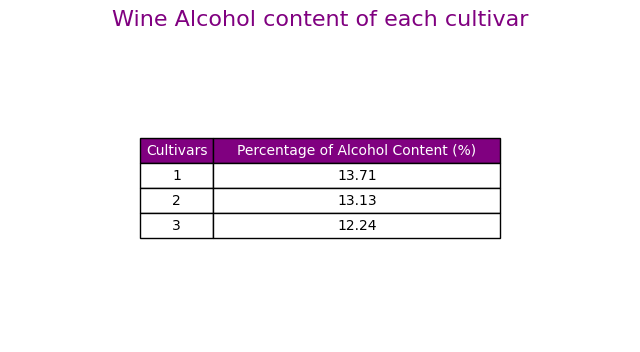

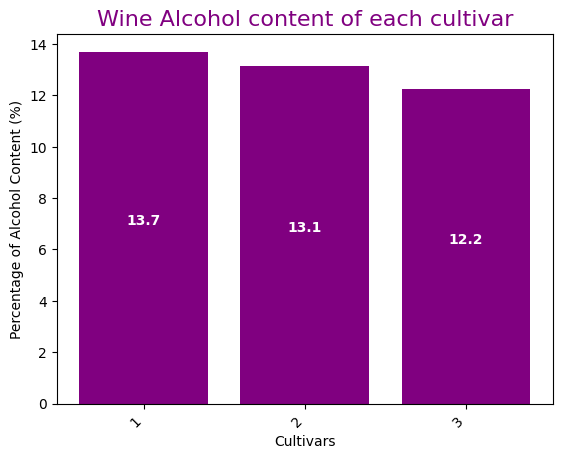

In [22]:
# Calculate the average alcohol content of each cultivar and compare them in graphs.
averagealcoholcontent = pd.Series({
    '1': df_cluster1['Alcohol'].mean().round(2),
    '2': df_cluster2['Alcohol'].mean().round(2),
    '3': df_cluster3['Alcohol'].mean().round(2)
})
generate_table(averagealcoholcontent.sort_values(ascending=False), "Wine Alcohol content of each cultivar", "Cultivars", "Percentage of Alcohol Content (%)")
generate_bar_chart(averagealcoholcontent.sort_values(ascending=False), "Wine Alcohol content of each cultivar", "Cultivars", "Percentage of Alcohol Content (%)")

#### Which cultivar produces the wine with the greatest sensation of freshness? 

From the chemical point of view, wines that produce a sensation of freshness are those with a high malic acid index.

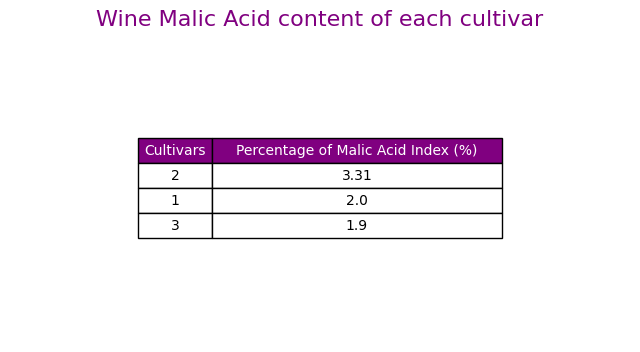

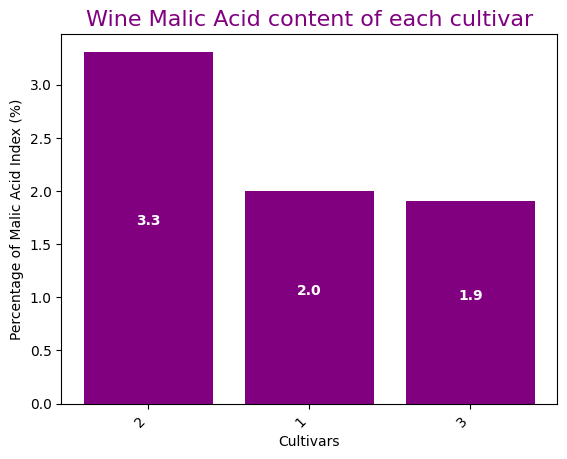

In [23]:
# Calculate the average malic acid index of each cultivar and compare them in graphs.
averagemalicacid = pd.Series({
    '1': df_cluster1['Malic_Acid'].mean().round(2),
    '2': df_cluster2['Malic_Acid'].mean().round(2),
    '3': df_cluster3['Malic_Acid'].mean().round(2)
})
generate_table(averagemalicacid.sort_values(ascending=False), "Wine Malic Acid content of each cultivar", "Cultivars", "Percentage of Malic Acid Index (%)")
generate_bar_chart(averagemalicacid.sort_values(ascending=False), "Wine Malic Acid content of each cultivar", "Cultivars", "Percentage of Malic Acid Index (%)")


#### Which cultivar produces the healthiest wine? 

From a scientific point of view, the wines that prove to be the healthiest are those with a high antioxidant index. (flavonoids and proanthocyanidins).

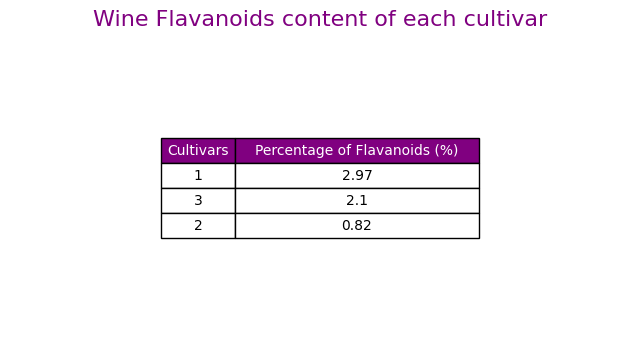

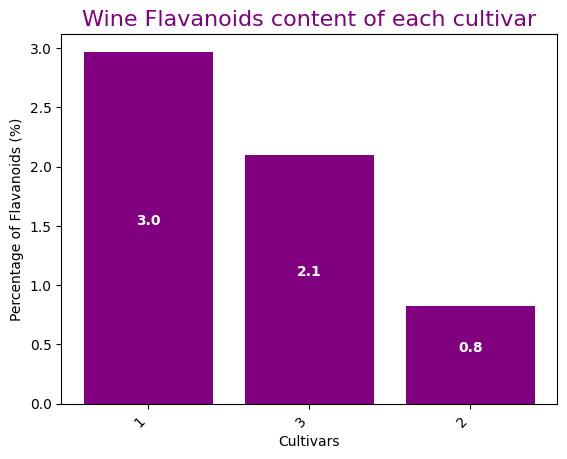

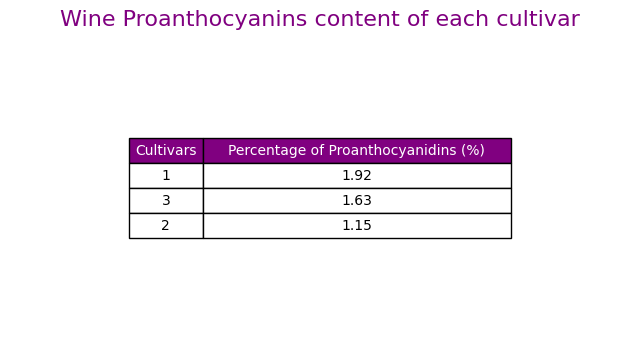

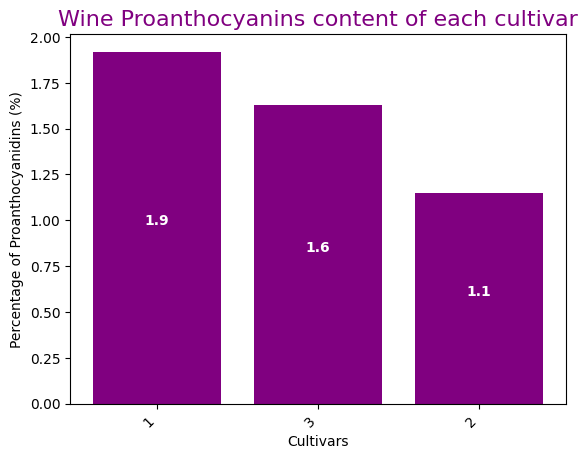

In [24]:
# Calculate the antioxidant index in the wine of each cultivar and compare them in graphs.
averageflavonoidscontent = pd.Series({
    '1': df_cluster1['Flavanoids'].mean().round(2),
    '2': df_cluster2['Flavanoids'].mean().round(2),
    '3': df_cluster3['Flavanoids'].mean().round(2)
})
generate_table(averageflavonoidscontent.sort_values(ascending=False), "Wine Flavanoids content of each cultivar", "Cultivars", "Percentage of Flavanoids (%)")
generate_bar_chart(averageflavonoidscontent.sort_values(ascending=False), "Wine Flavanoids content of each cultivar", "Cultivars", "Percentage of Flavanoids (%)")

averageproanthocyaninscontent = pd.Series({
    '1': df_cluster1['Proanthocyanins'].mean().round(2),
    '2': df_cluster2['Proanthocyanins'].mean().round(2),
    '3': df_cluster3['Proanthocyanins'].mean().round(2)
})
generate_table(averageproanthocyaninscontent.sort_values(ascending=False), "Wine Proanthocyanins content of each cultivar", "Cultivars", "Percentage of Proanthocyanidins (%)")
generate_bar_chart(averageproanthocyaninscontent.sort_values(ascending=False), "Wine Proanthocyanins content of each cultivar", "Cultivars", "Percentage of Proanthocyanidins (%)")


#### How does the chemical profile of wines produced in different cultivar vary? 

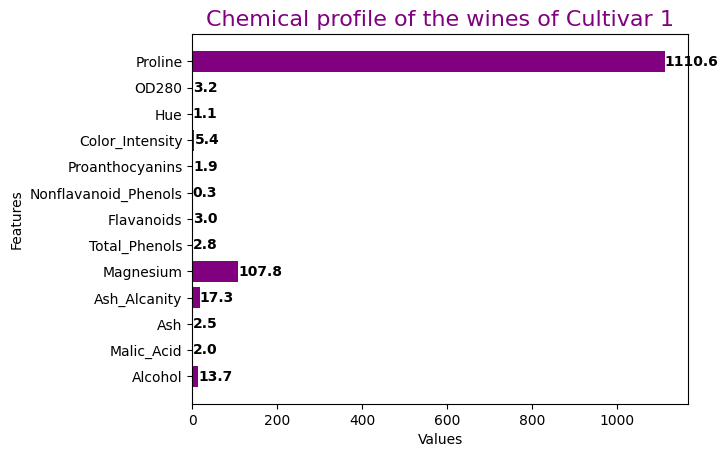

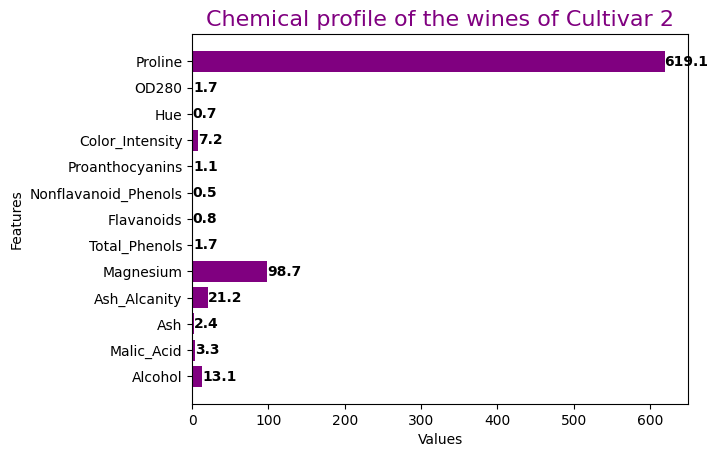

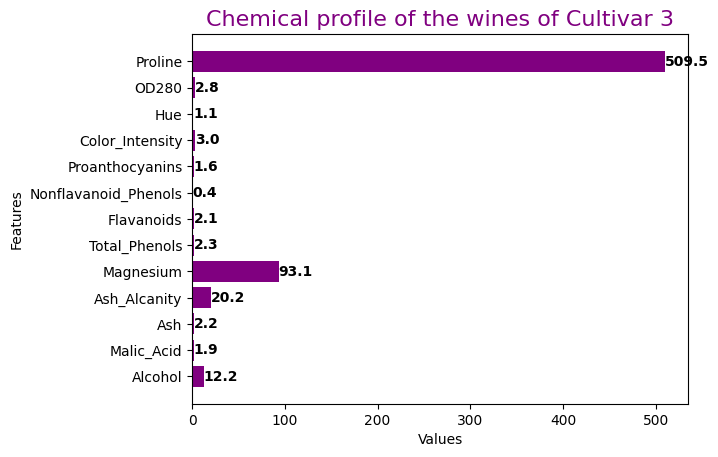

In [25]:
df_cluster1_mean = df_cluster1.mean()
df_cluster2_mean = df_cluster2.mean()
df_cluster3_mean = df_cluster3.mean()
generate_barh_chart(df_cluster1_mean,"Chemical profile of the wines of Cultivar 1","Features","Values")
generate_barh_chart(df_cluster2_mean,"Chemical profile of the wines of Cultivar 2","Features","Values")
generate_barh_chart(df_cluster3_mean,"Chemical profile of the wines of Cultivar 3","Features","Values")

### Data exporting (Output)

#### Output of data clustered in csv 

In [26]:
# Saving the DataFrame in a CSV file
output_csv = Path("dataset/wine-clustering_processed(output).csv")

try:
    df.to_csv(output_csv, index=False)
    print(f"DataFrame successfully saved to: {output_csv}")
except Exception as e:
    print(f"Error saving DataFrame: {e}")

DataFrame successfully saved to: dataset\wine-clustering_processed(output).csv
